<a href="https://colab.research.google.com/github/yeneua/schoolWorks/blob/main/%EB%B6%88%EB%B2%95%EA%B1%B0%EB%9E%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 셋 업로드

In [ ]:
# 방법1
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Fraud_Data.csv to Fraud_Data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Fraud_Data.csv']))

In [ ]:
# 방법2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /drive/MyDrive/Colab Notebooks/유통및판매데이터분석/data

[Errno 2] No such file or directory: '/drive/MyDrive/Colab Notebooks/유통및판매데이터분석/data'
/content


In [ ]:
data = pd.read_csv('Fraud_Data.csv')

In [ ]:
data.shape

(151112, 11)

In [133]:
ip = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/유통및판매데이터분석/data/IpAddress_to_Country.csv')

In [134]:
ip.shape

(138846, 3)

데이터 탐색하기

In [ ]:
# 결측치 확인
data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [ ]:
# 타겟변수
data['class'].value_counts()
# 0 : 정상거래 / 1 : 불법거래

0    136961
1     14151
Name: class, dtype: int64

In [ ]:
# 불법거래 비율확인
print('Fraud% : ', len(data[data['class'] == 1]) / len(data)*100, '%')

Fraud% :  9.364577267192546 %


In [ ]:
## Data exploration ##
## Check datas
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
data.signup_time.nunique() # unique한 시간대

151112

In [ ]:
min(data.signup_time) #가장 빨리 가입한 시간대

'2015-01-01 00:00:42'

In [ ]:
max(data.signup_time) # 가장 늦게 가입한 시간대

'2015-08-18 04:40:29'

In [ ]:
min(data.purchase_time) # 가장 빨리 구매한 시간대

'2015-01-01 00:00:44'

In [ ]:
max(data.purchase_time) # 가장 늦게 구매한 시간대

'2015-12-16 02:56:05'

In [ ]:
# to aggregate by month - 월 정보를 뽑아냄
data['p_mth'] = pd.to_datetime(data['purchase_time']).dt.month
data['s_mth'] = pd.to_datetime(data['signup_time']).dt.month

In [ ]:
data[['p_mth','s_mth']].head()

,p_mth,s_mth
0,4,2
1,6,6
2,1,1
3,5,4
4,9,7


class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_mth, dtype: object

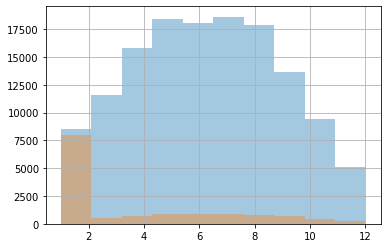

In [ ]:
# histogram for purchase_time
data.groupby("class").p_mth.hist(alpha = 0.4)
# 붉은색 : 1(불법거래), 파란색 : 0(정상거래)

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: s_mth, dtype: object

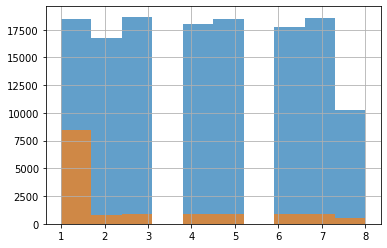

In [ ]:
# histogram for signup_time
data.groupby("class").s_mth.hist(alpha = 0.7) #alpha : 투명도
# 1

In [ ]:
# 월(month) 정보 의미가 있어 보인다
# 1월에 불법 거래가 많다 !!

In [ ]:
# The week of year - week 정보 뽑아냄
data['s_week'] = pd.to_datetime(data['signup_time']).dt.isocalendar().week #isocalendar():몇번째 주인지 찾아주는 기능
data['p_week'] = pd.to_datetime(data['purchase_time']).dt.isocalendar().week

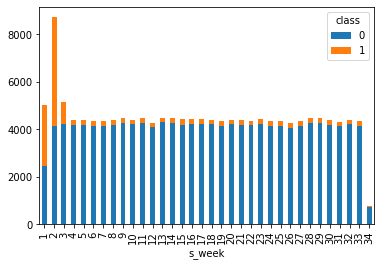

In [ ]:
# barplot for week of signup_time
data.groupby(['s_week', 'class']).size().unstack().plot.bar(stacked = True) #두개의 class가 겹쳐진 그래프
# => 초반 3개 주에 불법거래가 몰려있다

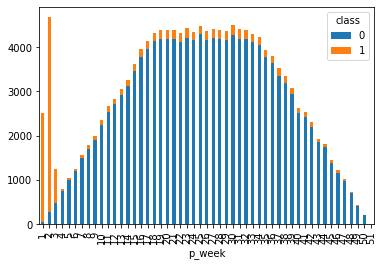

In [ ]:
# barplot for week of purchase_time
data.groupby(['p_week', 'class']).size().unstack().plot.bar(stacked = True)
# => 초반 3개 주에 불법거래가 몰려있다

In [ ]:
# The day of the week
data['s_day'] = pd.to_datetime(data['signup_time']).dt.dayofweek
data['p_day'] = pd.to_datetime(data['purchase_time']).dt.dayofweek

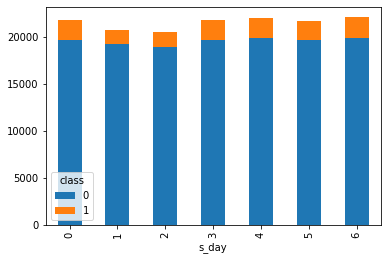

In [ ]:
# barplot for day of signup_time - 월~일 중에 어느 날에 거래가 됐는지? 
data.groupby(['s_day', 'class']).size().unstack().plot.bar(stacked = True)
# => 큰 차이는 없어보인다

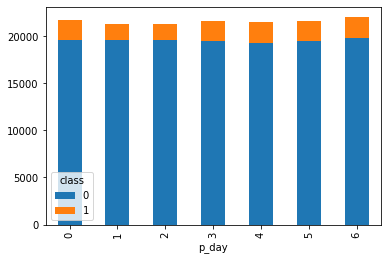

In [ ]:
# barplot for day of purchase_time
data.groupby(['p_day', 'class']).size().unstack().plot.bar(stacked = True)

In [ ]:
# 의미가 있어서 데이터를 뽑은 것X. 데이터를 탐색하는 과정.

In [ ]:
# check the difference between the two dates (dt = purchase_time - signup_time)
data['dt'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype('timedelta64[D]') # 구매시점 - 가입시점

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: dt, dtype: object

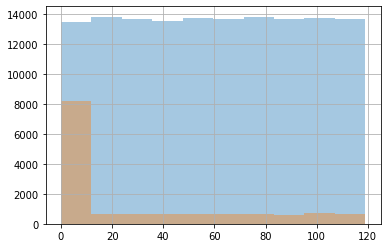

In [ ]:
# histogram
data.groupby("class").dt.hist(alpha = 0.4)
# => 차이가 작을수록 불법거래가 많다

In [ ]:
# Check cases where dt=0 : 가입하자마자 구매
data[data.dt == 0] 

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,1,1,2,2,6,6,0.0
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,1,1,2,2,2,2,0.0
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1,1,1,2,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,330098,2015-01-03 12:52:15,2015-01-03 12:52:16,38,EZENSUHMPLOIW,Ads,Chrome,M,27,2.152700e+08,1,1,1,1,1,5,5,0.0
151082,305464,2015-01-07 09:06:55,2015-01-07 09:06:56,90,TVYSUZLTILQQN,SEO,IE,M,34,3.067794e+09,1,1,1,2,2,2,2,0.0
151099,115473,2015-01-01 07:26:14,2015-01-01 07:26:15,61,ZRHCEVZHNIBJH,Direct,IE,M,24,3.003296e+09,1,1,1,1,1,3,3,0.0
151103,5557,2015-01-04 23:03:04,2015-01-04 23:03:05,27,AWFGZTEHXMWEJ,Direct,Chrome,M,39,3.306999e+09,1,1,1,1,1,6,6,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


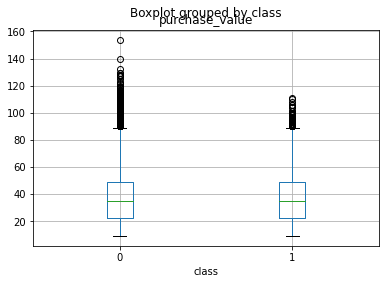

In [ ]:
# purhase_value - 정상/불법 거래 간 구매가격에 차이가 있는지?
data.boxplot(by = 'class', column = ['purchase_value'], grid = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


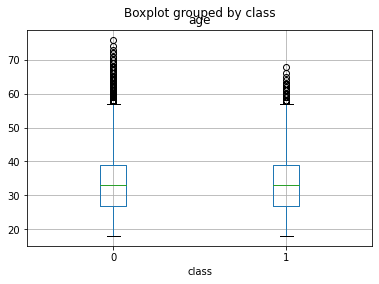

In [ ]:
# age - 정상/불법 거래 간 연령대별로 차이가 있는지?
data.boxplot(by = 'class', column = ['age'], grid = True)

In [ ]:
# device_id
data[['user_id', 'device_id']].groupby('device_id').count().sort_values(by = 'user_id', ascending = False)
# => 20명이 동일한 기기로 접속한 경우도 확인 가능

,user_id
device_id,
KIPFSCNUGOLDP,20
NGQCKIADMZORL,20
CQTUVBYIWWWBC,20
ITUMJCKWEYNDD,20
EQYVNEGOFLAWK,20
...,...
IXVBQLPWSAIDA,1
IXUYCZZVDXGPO,1
IXUWTGATQJEVG,1


In [ ]:
device_count = data[['user_id', 'device_id']].groupby('device_id').count().reset_index()

In [ ]:
device_count = device_count.rename(columns = {'user_id' : 'd_ct'})

In [ ]:
data = data.merge(device_count, how = 'left', on = 'device_id')

In [ ]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1


In [ ]:
# 정상 / 불법 거래인 경우에 device_count에 어떤 차이? -> pivot table

In [ ]:
t1 = data.groupby(['class', 'd_ct']).size().to_frame('size').reset_index().sort_values(['class','d_ct'], ascending = False)

In [ ]:
t1

,class,d_ct,size
39,1,20,114
38,1,19,90
37,1,18,169
36,1,17,207
35,1,16,538
34,1,15,568
33,1,14,740
32,1,13,767
31,1,12,992
30,1,11,1009


In [ ]:
t1.pivot_table(index = 'd_ct', columns = 'class', values = 'size').sort_values(('d_ct'), ascending = False)

class,0,1
d_ct,,
20,6,114
19,5,90
18,11,169
17,14,207
16,38,538
15,47,568
14,58,740
13,65,767
12,88,992


In [ ]:
# => device_count가 의미있는 변수구나 !! 확인가능

In [ ]:
pd.set_option('max_rows', 10) # 보고싶은 데이터 개수 조정(정보 양 조정)

In [ ]:
# ip_count - 동일한 ip로 얼마나 많은 사람들이 접속했는지?
ip_count = data[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_count = ip_count.rename(columns = {'user_id' : 'ip_ct'})
data = data.merge(ip_count, how = 'left', on = 'ip_address')

In [ ]:
# ip_address
data[['user_id', 'ip_address']].groupby('ip_address').count().sort_values(by = 'user_id', ascending = False)

,user_id
ip_address,
1.502818e+09,20
5.760609e+08,20
3.874758e+09,20
2.050964e+09,20
2.937899e+09,19
...,...
1.427304e+09,1
1.427303e+09,1
1.427285e+09,1


In [ ]:
t2 = data.groupby(['class', 'ip_ct']).size().to_frame('size').reset_index().sort_values(['class','ip_ct'], ascending = False)
t2.pivot_table(index = 'ip_ct', columns = 'class', values = 'size').sort_values(('ip_ct'), ascending = False)
# => 사기거래일수록 동일한 ip !

class,0,1
ip_ct,,
20,4,76
19,6,127
18,9,153
17,12,192
16,35,541
...,...,...
5,13,52
4,3,13
3,2,4


In [ ]:
# source - 접속경로
data.source.value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

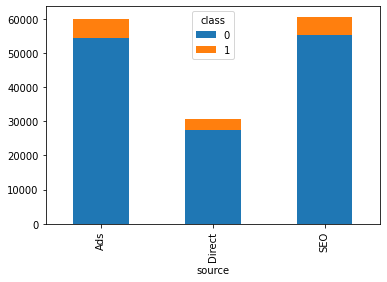

In [ ]:
data.groupby(['source', 'class']).size().unstack().plot(kind = 'bar', stacked = True)
# => 큰 차이는 없는 듯하다

In [ ]:
# browser - 브라우저 종류
data.browser.value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

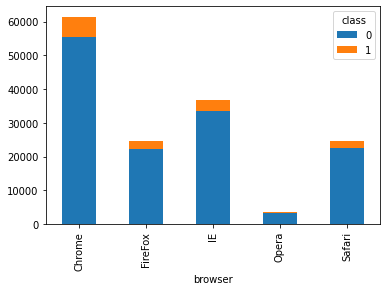

In [ ]:
data.groupby(['browser', 'class']).size().unstack().plot.bar(stacked = True)

In [ ]:
# sex
data.sex.value_counts()

M    88293
F    62819
Name: sex, dtype: int64

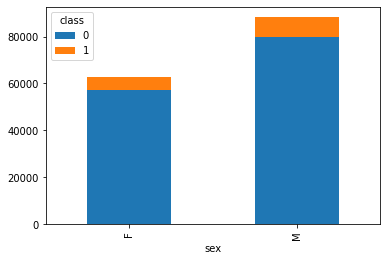

In [ ]:
data.groupby(['sex', 'class']).size().unstack().plot.bar(stacked = True)

2개의 df merge하기
<br> 첫번째 df의 ip주소를 다른 df의 두 개의 ip주소 범위와 매칭시키기

In [135]:
# IP address to country mapping
countries = []
for i in range(len(data)):
  ip_address = data.loc[i, 'ip_address']
  tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) &
           (ip['upper_bound_ip_address'] >= ip_address)]
  if len(tmp) == 1:
    countries.append(tmp['country'].values[0])
  else:
    countries.append('NA')

data['country'] = countries

In [137]:
data.head() # country 컬럼 생성확인

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct,ip_ct,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,4,2,9,16,1,5,52.0,1,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,6,6,23,24,6,0,0.0,1,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,1,1,1,1,3,3,0.0,12,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,5,4,18,19,1,0,5.0,1,1,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,9,7,30,37,1,2,50.0,1,1,United States


In [138]:
pd.set_option('max_rows', 10)

In [140]:
data['country'].value_counts()

United States     58049
NA                21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Myanmar               1
Vanuatu               1
Dominica              1
Niger                 1
Guadeloupe            1
Name: country, Length: 182, dtype: int64